In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

c:\Users\ratna\anaconda3\envs\kaggle\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [19]:
df = pd.read_csv("D:\My-LIB\Projects\ML\Time Series\input\PJME_hourly.csv\PJME_hourly.csv")
df = df.set_index("Datetime")
df.index = pd.to_datetime(df.index)

In [20]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


<AxesSubplot:title={'center':'PJME ENERGY USED IN MW'}, xlabel='Datetime'>

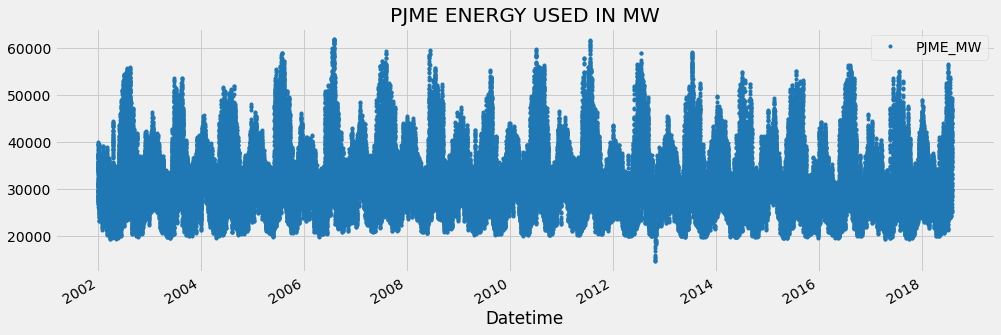

In [21]:
df.plot(style='.', figsize=(15,5), color=color_pal[0], title='PJME ENERGY USED IN MW')

## Train / Test Split

### we're gonna take all the data before jan 2015 as train data and 2015-2018 as test data

In [25]:
train = df.loc[df.index < '01-01-2015']
train.tail()

,PJME_MW
Datetime,
2014-01-01 20:00:00,36193.0
2014-01-01 21:00:00,35601.0
2014-01-01 22:00:00,34242.0
2014-01-01 23:00:00,32215.0
2014-01-02 00:00:00,30159.0


In [28]:
test = df.loc[df.index >= '01-01-2015']
test.tail()

,PJME_MW
Datetime,
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0
2018-01-02 00:00:00,38608.0


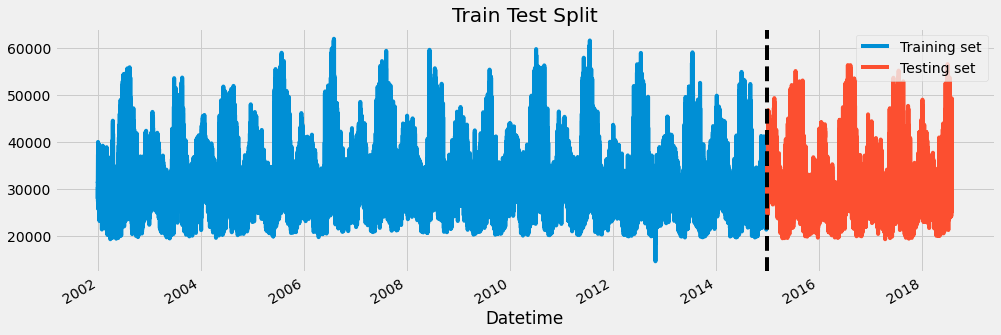

In [38]:
fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training Set', title='Train Test Split')
test.plot(ax=ax, label='Testing Set')
ax.legend(['Training set' , 'Testing set'])
ax.axvline('01-01-2015', color='black', ls='--')
plt.show()

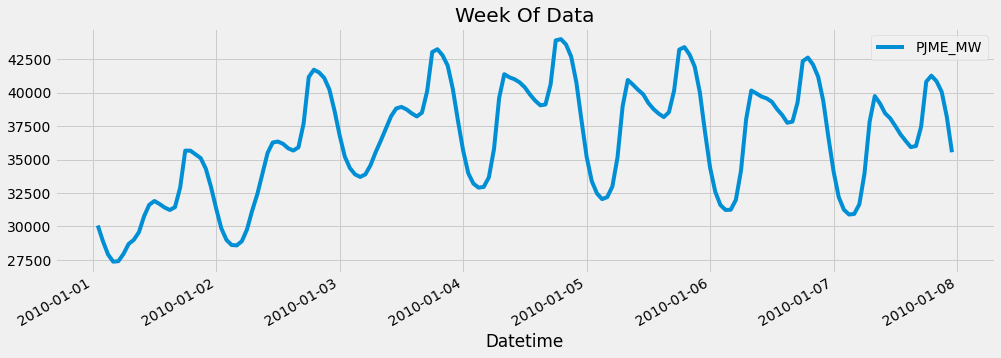

In [40]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

## Feature Creation


In [60]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayoftheyear'] = df.index.dayofyear
    return df

In [61]:
df = create_features(df)
df.head()

,PJME_MW,hour,day,dayofweek,quarter,monthoftheyear,year,dayoftheyear,month
Datetime,,,,,,,,,
2002-12-31 01:00:00,26498.0,1,31,1,4,12,2002,365,12
2002-12-31 02:00:00,25147.0,2,31,1,4,12,2002,365,12
2002-12-31 03:00:00,24574.0,3,31,1,4,12,2002,365,12
2002-12-31 04:00:00,24393.0,4,31,1,4,12,2002,365,12
2002-12-31 05:00:00,24860.0,5,31,1,4,12,2002,365,12


## Visualizing our Feature / Target realtionship

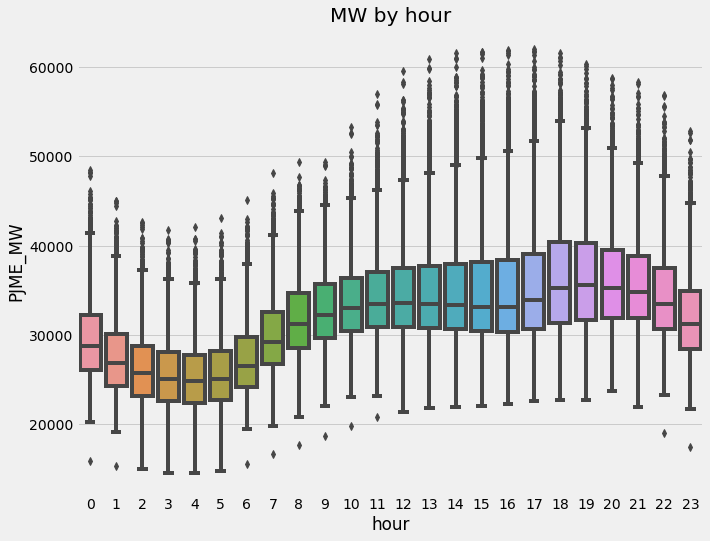

In [62]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df,x = 'hour', y='PJME_MW')
ax.set_title("MW by hour")
plt.show()

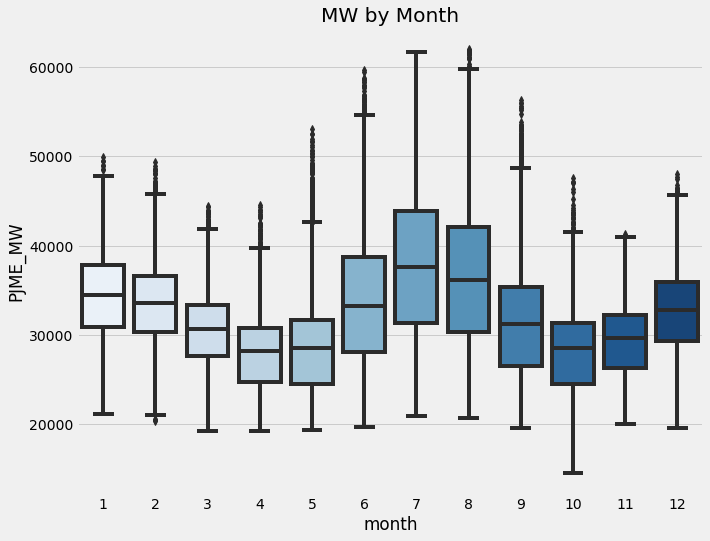

In [64]:
fig, am = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJME_MW', palette='Blues')
am.set_title('MW by Month')
plt.show()

## Create our Model